<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dia 2 - REDES CONVOLUCIONAIS DE CLASSIFICAÇÃO (Testando vários classificadores)

In [1]:
from sklearn.datasets import fetch_openml

# Carregar os dados MNIST
mnist = fetch_openml('mnist_784', version=1, parser="pandas")
X, y = mnist["data"], mnist["target"]
y = y.astype(int)

#Convertendo para uma matriz numpy ao invés de dataframe.
X = X.to_numpy()
Y = y.to_numpy()
X.shape, Y.shape

((70000, 784), (70000,))

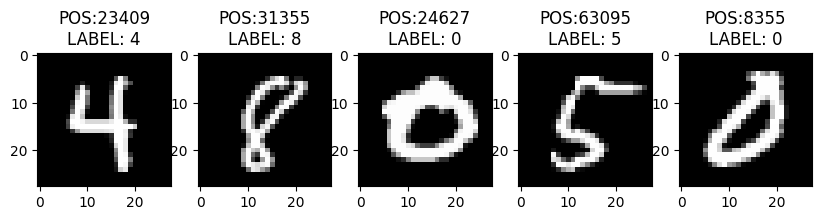

In [3]:
import random
import matplotlib.pyplot as plt
j=1
plt.figure(figsize=(10,10))
for i in random.sample(range(len(X)), 5):
  plt.subplot(1,5,j)
  plt.title(f"POS:{i}\nLABEL: {Y[i]}")
  plt.imshow(X[i].reshape((28,28)), cmap="gray")
  j+=1
plt.show()

# Experimento 1 - Rede neural densa

In [4]:
import numpy as np
Y2 = np.array([np.eye(10)[_] for _ in Y])
Y2[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y2, test_size=0.2, random_state=42)


In [6]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((56000, 784), (14000, 784), (56000, 10), (14000, 10))

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define o modelo sequencial
model = models.Sequential()

# Adiciona a camada de entrada e a primeira camada oculta
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))

# Adiciona a camada de saída
model.add(layers.Dense(10, activation='softmax'))

# Compila o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Treina o modelo
history = model.fit(X_train, Y_train, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
1750/1750 [==============================] - 6s 3ms/step - loss: 2.6186 - accuracy: 0.7782 - val_loss: 0.7142 - val_accuracy: 0.8238
Epoch 2/30
1750/1750 [==============================] - 4s 3ms/step - loss: 0.5027 - accuracy: 0.8727 - val_loss: 0.4938 - val_accuracy: 0.8812
Epoch 3/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.3621 - accuracy: 0.9043 - val_loss: 0.3667 - val_accuracy: 0.9158
Epoch 4/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2870 - accuracy: 0.9233 - val_loss: 0.2976 - val_accuracy: 0.9261
Epoch 5/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2561 - accuracy: 0.9311 - val_loss: 0.3058 - val_accuracy: 0.9233
Epoch 6/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.2389 - accuracy: 0.9343 - val_loss: 0.2956 - val_accuracy: 0.9304
Epoch 7/30
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2219 - accuracy: 0.9383 - val_loss: 0.3134 - val_accuracy:

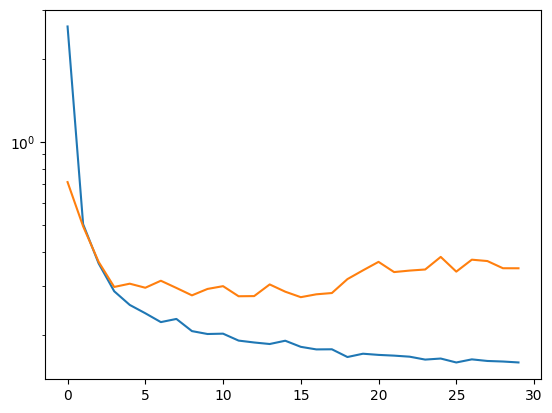

In [15]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.yscale("log")
